# Importing python packages

In [ ]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

# Testing Sentiment Analysis (sample)

In [ ]:
#Testing NLP - Sentiment Analysis using TextBlob
TextBlob("The movie is good").sentiment.polarity

0.7

# Importing YouTube comments data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#Importing YouTube comments data
comm = pd.read_csv('/content/drive/MyDrive/UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


# Displaying first 5 rows of data

In [ ]:
#Displaying the first 5 rows of the data
comm.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
#Finding the size of the data
comm.shape

(691400, 4)

# Extracting 1000 random samples from the data

In [ ]:
#Extracting 1000 random samples from the data
comm =comm.sample(200)
comm.shape

(200, 4)

# Calculating Sentiment polarity for each comment

In [ ]:
#Calculating the Sentiment Polarity
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

# Adding the Sentiment Polarity column to the data

In [ ]:
#Adding the Sentiment Polarity column to the data
comm['pol']=pol
comm

,video_id,comment_text,likes,replies,pol
503034,FcPs-bMkUjo,Always appreciate the honesty girl! Love your videos!,0,0,0.625000
27506,IMG0u0_cKNc,"Well we had here in the Philippines before, year \n2009",0,0,0.000000
42300,1u5jO57eD-U,Corden's doing full-on sketches now? \n\nI can dig IT.,0,0,0.000000
649348,x4SheWJkn6s,"im tired of calling my self salvi American, I'm just American",0,0,-0.133333
358925,g85RGiOgUtI,"I swear that you are the cutest, craziest soul!!! is it crazy that I dance with you when you sing you Theme song??? LOL #ILoveIt",0,0,0.100000
...,...,...,...,...,...
302379,_r5eTelhpmQ,"Love, love the lyrics.",0,0,0.500000
3787,WWexI9YiLSc,Yeah.. I'll watch anything that Liam Neeson is in.,2,0,0.000000
150145,xyNX4eH17uA,What are Juggalos?,0,0,0.000000
36395,LolP3Y7_Irs,Were you using a cup as a blindfold???,0,0,0.000000


# Converting the polarity values from continuous to categorical

In [ ]:
#Converting the polarity values from continuous to categorical
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

# Displaying Positive comments

In [ ]:
#Displaying the POSITIVE comments
df_positive = comm[comm.pol==1]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
503034,FcPs-bMkUjo,Always appreciate the honesty girl! Love your videos!,0,0,1.0
358925,g85RGiOgUtI,"I swear that you are the cutest, craziest soul!!! is it crazy that I dance with you when you sing you Theme song??? LOL #ILoveIt",0,0,1.0
171349,unByRjDRA34,I sub love you doll!💕,0,0,1.0
185689,TmVu7Sn7hZw,St. Michael wonders if the homeless lifestyle is in because of natural disasters and end times...hmmm,0,0,1.0
493372,biKYH7o8j7k,The thumbnail looks like a gay wedding HAHAHAHAAA,2,0,1.0
376200,c3JbJmXInOs,Looking to have fun really means they're going through there hoe phase and the just want to hookup,0,0,1.0
604644,ZYQ1cVRtMZU,Wow she looks JUST LIKE Rihanna like JUST LIKE HER WOW 😳 she's beautiful and you did such an outstanding job on her makeup very very beautiful!!! Great job Patrick 👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻,1,0,1.0
202935,AOQZNHueNQQ,SO GOOD,0,0,1.0
430136,tUPR5-igTVY,Love that you wrote and recorded this lovely song with Vince Gill - we saw him this year live at The Birchmere in Virginia. Your voice is amazing and brought me to tears with the powerful message ...,0,0,1.0
104013,6z-X4r5JkyI,The way ryland looks at Shane is so cute ❤️,0,0,1.0


# Displaying Negative comments

In [ ]:
#Displaying the NEGATIVE comments
df_positive = comm[comm.pol==-1]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
649348,x4SheWJkn6s,"im tired of calling my self salvi American, I'm just American",0,0,-1.0
685047,ZWTlL_w8cRA,Wow im just so shocked i loved her before and just the beginning upsetted me not in a bad way just made me sad seeing her scared. seeing this side of her made me realise she is a bigger and strong...,0,0,-1.0
220507,JvUGfF0iYtU,It sucks him dry,0,0,-1.0
423594,Uiccgh2GXzs,Seriously... Please put Sub Frame Connectors on the car! =O Your chassis is literally flexing as the suspension because everything else but the chassis is stiff. You NEED Sub Frame Connectors ...,0,1,-1.0
209599,dN9hA7J79VI,"I AM A PATRIOTIC AMERICAN AND I BOYCOTT THE NFL, NBA AND MLB ! I AM TIRED OF WATCHING UNPATRIOTIC, UNAMERICAN TRAITORS AND ASSHOLES .",1,0,-1.0
17480,bvomHFZO0mk,Now the beaners have a movie... Way to go Disney.... Fucking Inclusive,0,0,-1.0
132295,nJSrCX1U1hg,Why are people telling them to do things in the fort when the fort has been taken down? Literally in the video.,0,0,-1.0
307203,C-V1uXeyGmg,can you strobiscope the mirrtor and membrane for fake slotwmo?,0,0,-1.0
48816,lv5uC6cfO5c,even at 2x speed its still not funny.. here hold a thumbs down.. this song is dumb even you say so yourself at 2:25,0,0,-1.0
544310,9yUZTTLpDtk,"Is there a place where we can get like a PDF copy or something of the imperfecto ruler he uses, or is it a secret of cliff only",1,0,-1.0


# Displaying Neutral comments

In [ ]:
#Displaying the NEUTRAL comments
df_positive = comm[comm.pol==0]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
27506,IMG0u0_cKNc,"Well we had here in the Philippines before, year \n2009",0,0,0.0
42300,1u5jO57eD-U,Corden's doing full-on sketches now? \n\nI can dig IT.,0,0,0.0
25229,0fsKoK9yLE0,Whoo hooooo ❤️it😂😃😉,1,0,0.0
323116,H1YGg8nYkv0,"The woman is identified as Muslim professor Anila Daulatzai, who teaches at the Maryland Institute College of Art. Sucked in slut. No plane for you!",1,1,0.0
646670,a-9IZz8Ry5I,Pulled the dongle by the wire like an asshole.,0,0,0.0
300677,zmg9tVaMVd4,Holy hell! Puting all these wannabes in their place! The Goddess has arrived! Take a seat kids!,0,0,0.0
244782,WRzqSDyOSbY,I can’t believe she has youtube! Not a lot of celebs have time for utube,0,0,0.0
615625,5qlSfNVp3fU,NaN,0,0,0.0
31795,qPDZZj6By3Y,Why did the BBC not intervene? Humans should provide food for all wildlife to prevent this from happening,0,0,0.0
280391,M1nSzaWFTDE,*Reads title\nMe: how does that even happen,0,0,0.0


# Calculating the count of Positive, Negative & Neutral comments

 1.0    88
 0.0    80
-1.0    32
Name: pol, dtype: int64

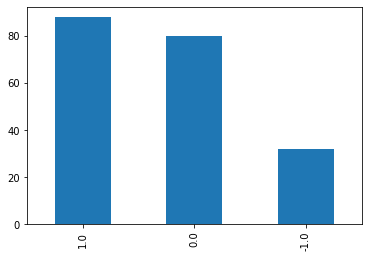

In [ ]:
comm.pol.value_counts().plot.bar()
comm.pol.value_counts()